In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
print("Movie Data has: rows:{} And columns:{}".format(df.shape[0], df.shape[1]))

Movie Data has: rows:5043 And columns:28


In [4]:
# Checking for missing values
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 2698 missing values in the dataframe


In [5]:
# Checking for % of missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,gross,budget,aspect_ratio,content_rating,plot_keywords,title_year,director_name,director_facebook_likes,num_critic_for_reviews,actor_3_name,...,actor_1_name,actor_1_facebook_likes,country,movie_facebook_likes,genres,movie_title,num_voted_users,movie_imdb_link,imdb_score,cast_total_facebook_likes
Total,884.000000,492.000000,329.000000,303.000000,153.000000,108.000000,104.000000,104.000000,50.000000,23.000000,...,7.000000,7.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,17.529248,9.756098,6.523895,6.008328,3.033908,2.141582,2.062265,2.062265,0.991473,0.456078,...,0.138806,0.138806,0.099147,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# checking the columns of the dataframe
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
# Checking the title year columns

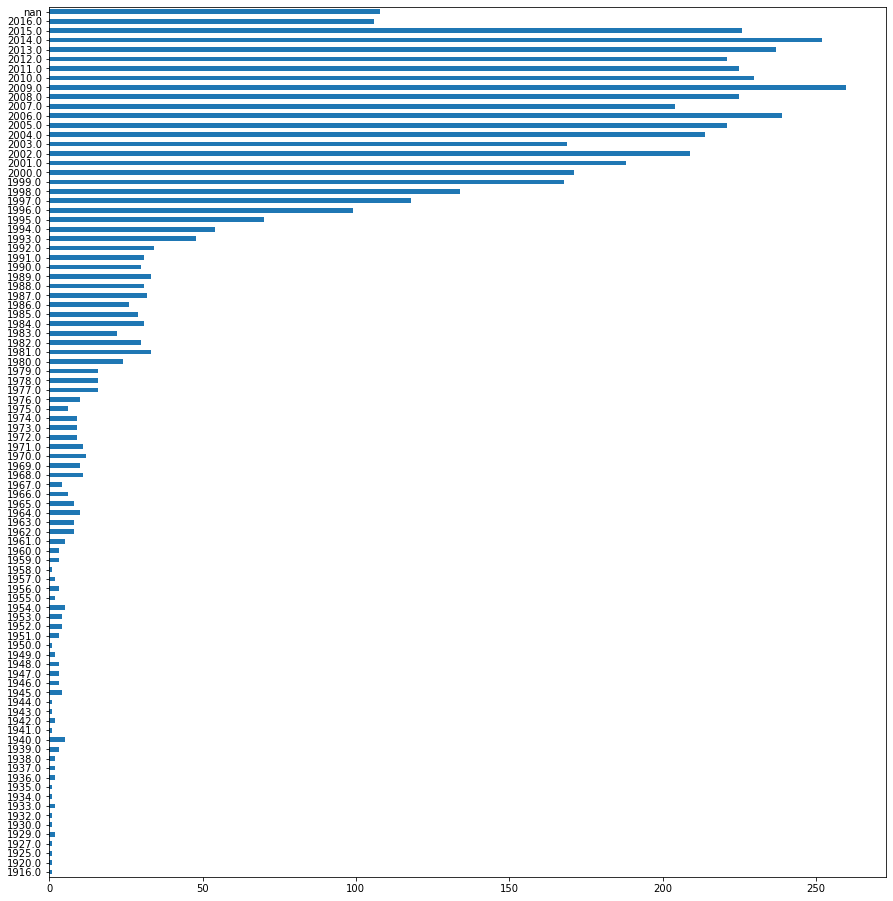

In [8]:
df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [9]:
(df.movie_title == "Titanic\xa0").sum()

1

In [10]:
df.loc[df.movie_title=="Titanic\xa0", ["director_name","actor_1_name","actor_2_name","actor_3_name","genres","movie_title"]]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
26,James Cameron,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,Drama|Romance,Titanic


In [11]:
# Selecting the relevant columns I need for the new DataFrame 

In [12]:
data = df.loc[:,["director_name","actor_1_name","actor_2_name","actor_3_name","genres","movie_title"]]

In [13]:
# Checking result
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [14]:
# Checking for perecentage of missing values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,director_name,actor_3_name,actor_2_name,actor_1_name,movie_title,genres
Total,104.000000,23.000000,13.000000,7.000000,0.0,0.0
Percent,2.062265,0.456078,0.257783,0.138806,0.0,0.0


In [15]:
# Replacing missing values with "Unknown"

In [16]:
# note :  i create a copy of the data so when i run into issues all i have to do is rerun this column instead of restarting all the columns
data2 = data[:]

In [17]:
data.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'genres', 'movie_title'],
      dtype='object')

In [18]:
# fucntion to replace Missing values ie all Nan in the df with Unknown
def fill_na(data):
    """Iterate through columns , if any nulls replace with "Unkonwn" """
    for col in data.columns:
        if (data[col].isnull().any()):
            if (col):
                data[col].fillna("Unknown", inplace=True)         
    return data

data = fill_na(data)

In [19]:
# Checking results
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [20]:
# Checking movie genres columns
data.genres

0       Action|Adventure|Fantasy|Sci-Fi
1              Action|Adventure|Fantasy
2             Action|Adventure|Thriller
3                       Action|Thriller
4                           Documentary
                     ...               
5038                       Comedy|Drama
5039       Crime|Drama|Mystery|Thriller
5040              Drama|Horror|Thriller
5041               Comedy|Drama|Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [21]:
data['genres'].str.contains('|')
data['genres'].nunique()

914

In [22]:
data2

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,Unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [23]:
data.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

# Splitting the genre column into several genres

In [24]:
df_split_genre = data2.copy()
split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)

In [25]:
df_split_genre.columns

Index(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'movie_title', 'genre_split'],
      dtype='object')

# Plotting Movie Genre Column

''

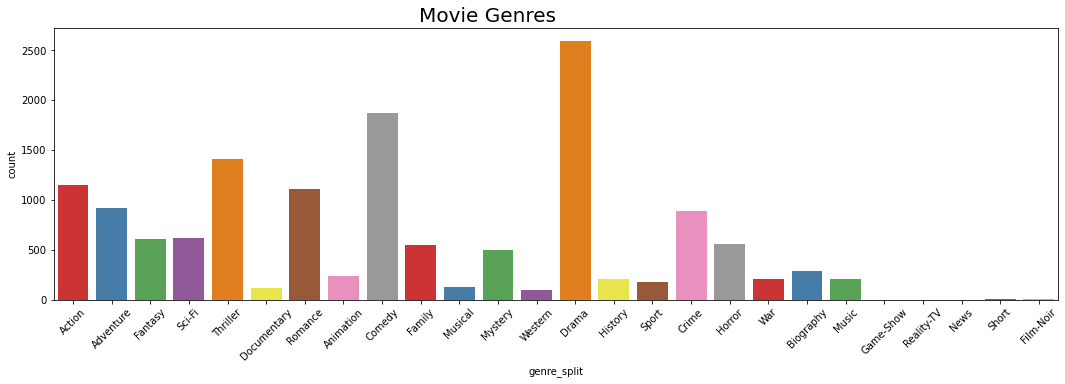

In [26]:
plt.figure(figsize=(18,5))
chart = sns.countplot(data = df_split_genre,
                     x = "genre_split",
                     palette="Set1")

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Movie Genres" , fontsize = 20 , horizontalalignment="right")
;

# Replacing "|" in movie genres column with " " ie whitesplace

In [27]:
data["genres"] = data['genres'].str.replace('|' , " ")

# OR  data['genres'] = data['genres'].str.split('|')

In [28]:
# Checking results
data.genres

0       Action Adventure Fantasy Sci-Fi
1              Action Adventure Fantasy
2             Action Adventure Thriller
3                       Action Thriller
4                           Documentary
                     ...               
5038                       Comedy Drama
5039       Crime Drama Mystery Thriller
5040              Drama Horror Thriller
5041               Comedy Drama Romance
5042                        Documentary
Name: genres, Length: 5043, dtype: object

In [29]:
# Cleaning movie title column
data.movie_title

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [30]:
# Note movie titles have some vlaues attached to them. I will have to remove them.
display(df.movie_title[0])

df.movie_title[1]

'Avatar\xa0'

"Pirates of the Caribbean: At World's End\xa0"

In [31]:
data["movie_title"] = data["movie_title"].apply(lambda x: x[:-1])

In [32]:
# check results

display(data["movie_title"][0])
data["movie_title"][1]

'Avatar'

"Pirates of the Caribbean: At World's End"

In [34]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [44]:
# renaming columns
data.rename(columns = {"actor_1_name":"Main_actor","actor_2_name":"Second_actor",
            "actor_3_name":"Third_actor"} , inplace=True)

In [45]:
# Check results
data.columns

Index(['director_name', 'Main_actor', 'Second_actor', 'Third_actor', 'genres',
       'movie_title'],
      dtype='object')

In [38]:
data.isna().sum()

director_name    0
First_actor      0
Second_actor     0
Third_actor      0
genres           0
movie_title      0
dtype: int64

In [46]:
# creating a new columns by combining all entities from each movie
data["combination"] = data["Main_actor"] + " " + data["Second_actor"] + " " + data["Third_actor"] + " " + data["director_name"] + " " + data["genres"]


In [47]:
# saving the new DataFrame
data.to_csv("cleaned_data.csv" , index=False)

In [48]:
# checking results
df = pd.read_csv("cleaned_data.csv")
df.head()

,director_name,Main_actor,Second_actor,Third_actor,genres,movie_title,combination
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,Doug Walker Rob Walker Unknown Doug Walker Doc...
